<a href="https://colab.research.google.com/github/LeiteGabriel/teste/blob/main/HoughTransform_detectando_linhas_scikit_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Grupo: Gabriel Leite de Sousa - 31861571

# Hough Line Transform

## Objetivos

Neste tutorial

 * Entenderemos o conceito da Transformação de Hough
 * Veremos como usá-la para detectar linhas em uma imagem
 * Veremos as seguintes funções: `skimage.transform (hough_line, hough_line_peaks,                 probabilistic_hough_line)`

https://scikit-image.org/docs/dev/auto_examples/edges/plot_line_hough_transform.html

## Teoria

A Transformação de Hough é uma técnica popular de se detectar qualquer forma, se vc puder representá-la em uma forma matemática. Ela pode detectar a forma mesmo se estiver quebrada ou levemente distorcida. Veremos como ela funciona para uma linha.

Uma linha pode ser representada por $y = mx+c$ ou na forma paramétrica, como $\rho = x \cos \theta + y \sin \theta$ onde $\rho$ é a distância perpendicular da origem até a linha, e $\theta$ é o ângulo formado por esta linha perpendicular e o eixo horizontal medido em sentido anti-horário. (Esta direção varia dependendo de como vc representa o sistema de coordenadas. Esta é a representação utilizada no OpenCV). Veja a imagem abaixo:

![Alt text](houghlines1.svg)

Assim, se a linha está passando na origem, ela terá um $\rho$ positivo e um  ângulo $\theta$ menor que 180. Se ela estiver acima da origem, ao invés de ter um ângulo maior do que 180, o ângulo será menor que 180, e o $\rho$ será negativo. Qualquer linha vertical terá 0 graus e linhas horizontais terão 90 graus.

Vejamos como a Transformação Hough funciona para linhas. Qq linha pode ser representada com estes dois termos $(\rho, \theta)$. Assim, primeiro criamos um array 2D ou acumulador (para manter os valores dos dois parâmetros) e é definido inicialmente como 0. As linhas denotam o $\rho$ e as colunas denotam como $\theta$. O tamanho do array depende da acurácia requerida. Suponha que se queira a acurácia dos ângulos em 1 grau, vc vai precisar de 180 colunas. Para $\rho$, a distância máxima possível é o comprimento da diagonal da imagem. Assim, tomando uma acurácia de um pixel, o número de linhas pode ser o comprimento da diagonal da imagem.

Considere uma imagem 100x100 com uma linha horizontal no meio. Tome o primeiro ponto da linha. Vc sabe seus valores $(x,y)$. Agora na equação da linha, coloque os valores $\theta = 0,1,2, \cdots, 180$ e verifique o $\rho$ que se terá. Para cada par $(\rho,\theta)$, vc incrementa o valor por um no seu acumulador na célula $(\rho,\theta)$ correspondente. Assim, agora no acumulador, a célula (50,90) = 1 junto com algumas outras células.

Agora pegue o segundo ponto da linha. Faça o mesmo acima. Incremente os valores nas células correspondentes a $(\rho,\theta)$ que obteve. Desta vez, a célula (50,90) = 2. Vc está fazendo, na realidade, uma votação nos valores de $(\rho,\theta)$. Vc continua este processo para cada ponto na linha. Em cada ponto, a célula (50,90) vai ser incrementada ou votada, enquanto outras células podem ou não serem votadas. Desta maneira, no final, a célula (50,90) terá o maior número de votos. Assim, se vc busca no acumulador os máximos de votos, vc obterá o valor (50,90) que diz, há uma linha nesta imagem à distância 50 da origem e a um ângulo (normal) de 90 graus. A animação abaixo mostra isso (Image Courtesy: Amos Storkey )

![gif](houghlinesdemo.gif)

Esta é a maneira que a Transformação Hough funciona para linhas. Ela é simples e vc mesmo pode implementá-la utilizando o `Numpy`. Abaixo está uma imagem que mostra o acumulador. Pontos brilhantes (brancos) em algumas localizações denotam que eles são os parâmetros de possíveis linhas na imagem. (Image courtesy: Wikipedia)


![houghlines2](houghlines2.jpg)

## Exemplos

In [1]:
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10
from matplotlib import pyplot as plt

In [2]:
from skimage.transform import (hough_line, hough_line_peaks,
                               probabilistic_hough_line)
from skimage.feature import canny
from skimage import data
from skimage import io

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

### Exemplo da documentação do scikit-image

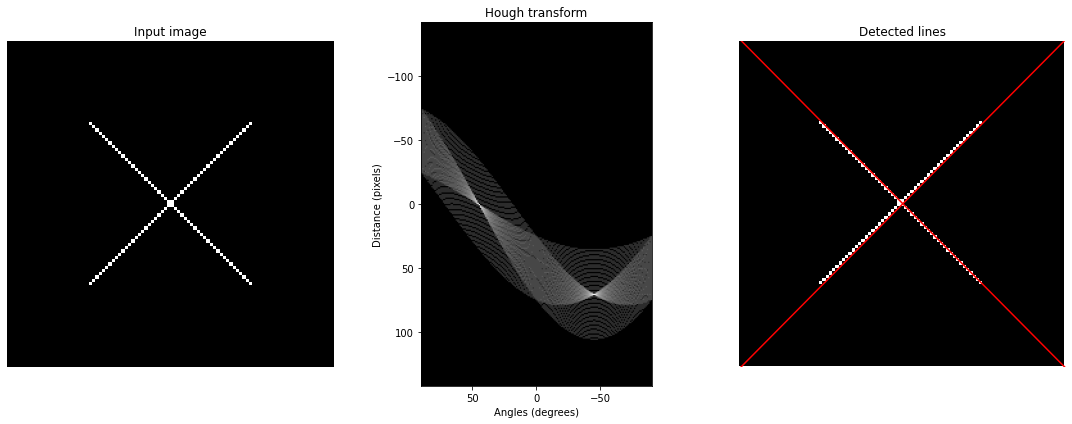

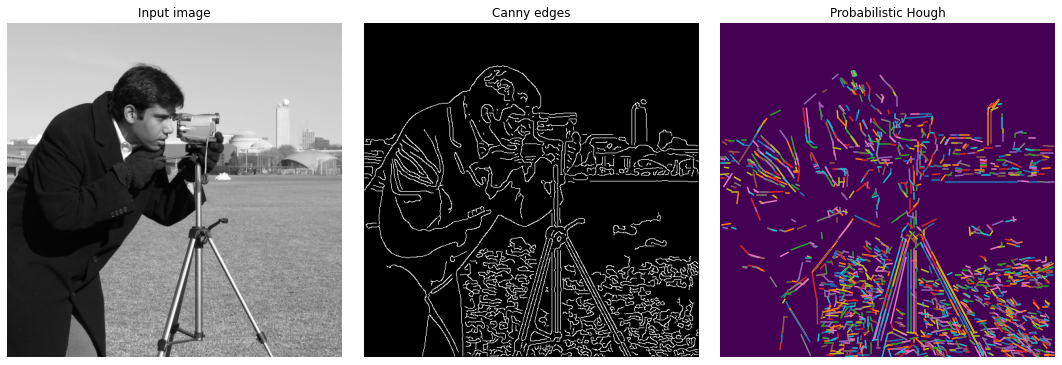

In [9]:
# Constructing test image
image = np.zeros((100, 100))
idx = np.arange(25, 75)
image[idx[::-1], idx] = 255
image[idx, idx] = 255

# Classic straight-line Hough transform
h, theta, d = hough_line(image)

# Generating figure 1
fig, axes = plt.subplots(1, 3, figsize=(15, 6), subplot_kw = None)
ax = axes.ravel()

ax[0].imshow(image, cmap=cm.gray)
ax[0].set_title('Input image')
ax[0].set_axis_off()

ax[1].imshow(np.log(1 + h),
             extent=[np.rad2deg(theta[-1]), np.rad2deg(theta[0]), d[-1], d[0]],
             cmap=cm.gray, aspect=1/1.5)
ax[1].set_title('Hough transform')
ax[1].set_xlabel('Angles (degrees)')
ax[1].set_ylabel('Distance (pixels)')
ax[1].axis('image')

ax[2].imshow(image, cmap=cm.gray)
for _, angle, dist in zip(*hough_line_peaks(h, theta, d)):
    y0 = (dist - 0 * np.cos(angle)) / np.sin(angle)
    y1 = (dist - image.shape[1] * np.cos(angle)) / np.sin(angle)
    ax[2].plot((0, image.shape[1]), (y0, y1), '-r')
ax[2].set_xlim((0, image.shape[1]))
ax[2].set_ylim((image.shape[0], 0))
ax[2].set_axis_off()
ax[2].set_title('Detected lines')

plt.tight_layout()
plt.show()

# Line finding using the Probabilistic Hough Transform
image = data.camera()
edges = canny(image, 2, 1, 25)
lines = probabilistic_hough_line(edges, threshold=10, line_length=5,
                                 line_gap=3)

# Generating figure 2
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(image, cmap=cm.gray)
ax[0].set_title('Input image')

ax[1].imshow(edges, cmap=cm.gray)
ax[1].set_title('Canny edges')

ax[2].imshow(edges * 0)
for line in lines:
    p0, p1 = line
    ax[2].plot((p0[0], p1[0]), (p0[1], p1[1]))
ax[2].set_xlim((0, image.shape[1]))
ax[2].set_ylim((image.shape[0], 0))
ax[2].set_title('Probabilistic Hough')

for a in ax:
    a.set_axis_off()
    # a.set_adjustable('box-forced')

plt.tight_layout()
plt.show()



### Exemplo com a imagem do sudoku

In [ ]:
from skimage import feature

image = np.zeros((100, 100))

image = io.imread('../images/teste1.jpg',0)

from skimage.filters import threshold_otsu

img = feature.canny(image)

h, theta, d = hough_line(img)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,6),subplot_kw={'adjustable': 'box-forced'})

ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')
ax1.set_axis_off()

ax2.imshow(np.log(1 + h), extent=[np.rad2deg(theta[-1]), np.rad2deg(theta[0]), d[-1], d[0]], cmap=plt.cm.gray , aspect=1.5/1)
ax2.set_title('Hough transform')
ax2.set_xlabel('Angles (degrees)')
ax2.set_ylabel('Distance (pixels)')
ax2.axis('image')

ax3.imshow(image, cmap=plt.cm.gray)
rows, cols = image.shape
for _, angle, dist in zip(*hough_line_peaks(h, theta, d)):
    y0 = (dist - 0 * np.cos(angle)) / np.sin(angle)
    y1 = (dist - cols * np.cos(angle)) / np.sin(angle)
    ax3.plot((0, cols), (y0, y1), '-r')
ax3.axis((0, cols, rows, 0))
ax3.set_title('Detected lines')
ax3.set_axis_off()

# Line finding, using the Probabilistic Hough Transform

#image = data.camera()
image = io.imread('../images/teste1.jpg',0)

edges = canny(image, 2, 1, 25)
lines = probabilistic_hough_line(edges, threshold=10, line_length=5,
                                 line_gap=3)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5), sharex=True, sharey=True)

ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')
ax1.set_axis_off()
ax1.set_adjustable('box-forced')

ax2.imshow(edges, cmap=plt.cm.gray)
ax2.set_title('Canny edges')
ax2.set_axis_off()
ax2.set_adjustable('box-forced')

ax3.imshow(edges * 0)

for line in lines:
    p0, p1 = line
    ax3.plot((p0[0], p1[0]), (p0[1], p1[1]))

ax3.set_title('Probabilistic Hough')
ax3.set_axis_off()
ax3.set_adjustable('box-forced')
plt.show()

## Exercícios



1. Experimente a utilização do detector de bordas **Sobel** no lugar do **Canny** e compare os resultados.
2. Experimente os diversos parâmetros da função `probabilistic_hough_line` e comente os resultados.
3. Explique a diferença entre as funções `hough_line` e a `probabilistic_hough_line`
4. Utilize outras imagens para experimentar a função `probabilistic_hough_line` e comente seus resultados.

## Submeta:

1. Um notebook com todas as suas respostas, e com a células de execução (saída) mostrando o que foi feito.
2. Um arquivo **pdf** oriundo deste mesmo notebook com todas as células de execução mostrando o que foi feito (pode ser um `print` do html).

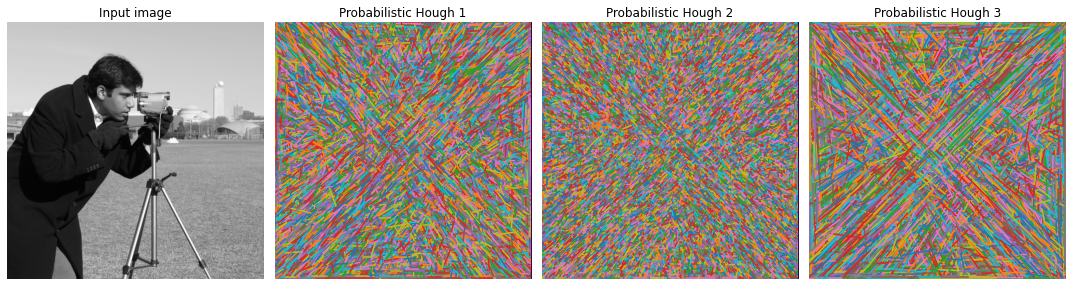

In [39]:
#Exercicio 1
from skimage.filters import sobel
from skimage.transform import probabilistic_hough_line

# Line finding using the Probabilistic Hough Transform
image = data.camera()
edges = sobel(image)

lines = probabilistic_hough_line(edges, threshold=1, line_length=0, line_gap=5) 
lines1 = probabilistic_hough_line(edges, threshold=10, line_length=10, line_gap=10)
lines2 = probabilistic_hough_line(edges, threshold=100, line_length=20, line_gap=20)

# Generating figure 2
fig, axes = plt.subplots(1, 4, figsize=(15, 5), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(image, cmap=cm.gray)
ax[0].set_title('Input image')

ax[1].imshow(edges * 0)
for line in lines1:
  p0, p1 = line
  ax[1].plot((p0[0], p1[0]), (p0[1], p1[1]))
ax[1].set_xlim((0, image.shape[1]))
ax[1].set_ylim((image.shape[0], 0))
ax[1].set_title('Probabilistic Hough 1')

ax[2].imshow(edges * 0)
for line in lines:
  p0, p1 = line
  ax[2].plot((p0[0], p1[0]), (p0[1], p1[1]))
ax[2].set_xlim((0, image.shape[1]))
ax[2].set_ylim((image.shape[0], 0))
ax[2].set_title('Probabilistic Hough 2')

ax[3].imshow(edges * 0)
for line in lines2:
  p0, p1 = line
  ax[3].plot((p0[0], p1[0]), (p0[1], p1[1]))
ax[3].set_xlim((0, image.shape[1]))
ax[3].set_ylim((image.shape[0], 0))
ax[3].set_title('Probabilistic Hough 3')

for a in ax:
  a.set_axis_off()
plt.tight_layout()
plt.show()

###Conclusão - Exercício 1

Ao usarmos o sobel notamos que perdemos toda a definição das linhas resultantes, pois ele não desconsidera o ruído na hora de montar a imagem

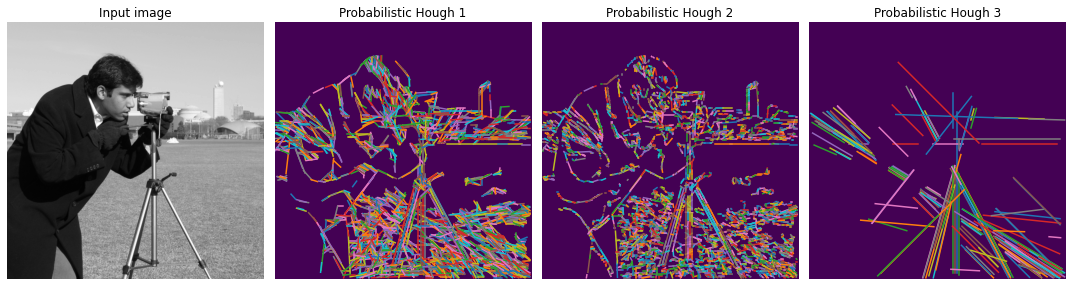

In [25]:
# Exercicio 2

from skimage.transform import probabilistic_hough_line# Line finding using the Probabilistic Hough Transform
image = data.camera()
edges = canny(image, 2, 1, 25)

lines = probabilistic_hough_line(edges, threshold=1, line_length=0, line_gap=5) 
lines1 = probabilistic_hough_line(edges, threshold=10, line_length=10, line_gap=10)
lines2 = probabilistic_hough_line(edges, threshold=100, line_length=20, line_gap=20)

# Generating figure 2
fig, axes = plt.subplots(1, 4, figsize=(15, 5), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(image, cmap=cm.gray)
ax[0].set_title('Input image')

ax[1].imshow(edges * 0)
for line in lines1:
  p0, p1 = line
  ax[1].plot((p0[0], p1[0]), (p0[1], p1[1]))
ax[1].set_xlim((0, image.shape[1]))
ax[1].set_ylim((image.shape[0], 0))
ax[1].set_title('Probabilistic Hough 1')

ax[2].imshow(edges * 0)
for line in lines:
  p0, p1 = line
  ax[2].plot((p0[0], p1[0]), (p0[1], p1[1]))
ax[2].set_xlim((0, image.shape[1]))
ax[2].set_ylim((image.shape[0], 0))
ax[2].set_title('Probabilistic Hough 2')

ax[3].imshow(edges * 0)
for line in lines2:
  p0, p1 = line
  ax[3].plot((p0[0], p1[0]), (p0[1], p1[1]))
ax[3].set_xlim((0, image.shape[1]))
ax[3].set_ylim((image.shape[0], 0))
ax[3].set_title('Probabilistic Hough 3')

for a in ax:
  a.set_axis_off()
plt.tight_layout()
plt.show()

###Conclusão - Exercício 2

threshold: Não há uma diferença muito notável, apenas com valores muito altos

line lenght: Quanto menor o seu valor, há uma maior segmentação em relação às retas

line gap: Quanto maior, somente representa as linhas longas e deixamos de identificar a imagem em si


###Exercício 3


Podemos notar que a diferença entre ambos é de que no caso do hough_line() podemos ver que é retornado a posição dos pixels de início e fim da reta e não a reta em si. Enquanto o probabilistic_hough_line() notamos que ele não retorna apenas os pontas da reta e sim todo o traçado da reta.

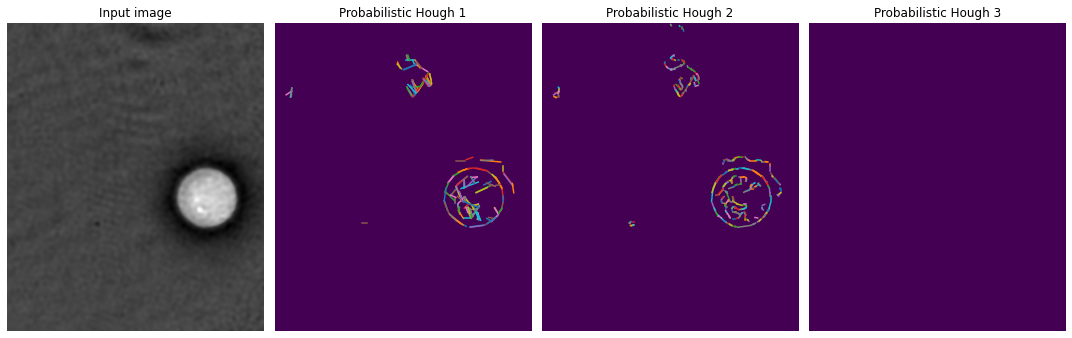

In [32]:
#Exercício 4 - Ex1

from skimage.transform import probabilistic_hough_line# Line finding using the Probabilistic Hough Transform
image = data.cell()
edges = canny(image, 2, 1, 25)

lines = probabilistic_hough_line(edges, threshold=1, line_length=0, line_gap=5) 
lines1 = probabilistic_hough_line(edges, threshold=10, line_length=10, line_gap=10)
lines2 = probabilistic_hough_line(edges, threshold=100, line_length=20, line_gap=20)

# Generating figure 2
fig, axes = plt.subplots(1, 4, figsize=(15, 5), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(image, cmap=cm.gray)
ax[0].set_title('Input image')

ax[1].imshow(edges * 0)
for line in lines1:
  p0, p1 = line
  ax[1].plot((p0[0], p1[0]), (p0[1], p1[1]))
ax[1].set_xlim((0, image.shape[1]))
ax[1].set_ylim((image.shape[0], 0))
ax[1].set_title('Probabilistic Hough 1')

ax[2].imshow(edges * 0)
for line in lines:
  p0, p1 = line
  ax[2].plot((p0[0], p1[0]), (p0[1], p1[1]))
ax[2].set_xlim((0, image.shape[1]))
ax[2].set_ylim((image.shape[0], 0))
ax[2].set_title('Probabilistic Hough 2')

ax[3].imshow(edges * 0)
for line in lines2:
  p0, p1 = line
  ax[3].plot((p0[0], p1[0]), (p0[1], p1[1]))
ax[3].set_xlim((0, image.shape[1]))
ax[3].set_ylim((image.shape[0], 0))
ax[3].set_title('Probabilistic Hough 3')

for a in ax:
  a.set_axis_off()
plt.tight_layout()
plt.show()

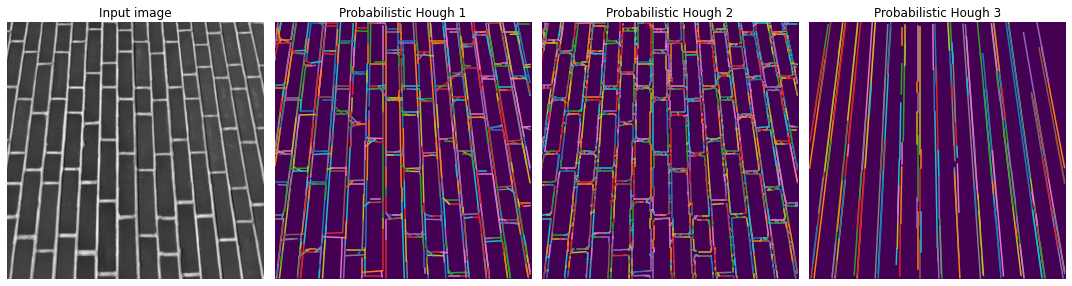

In [34]:
#Exercício 4 - Ex2

from skimage.transform import probabilistic_hough_line# Line finding using the Probabilistic Hough Transform
image = data.brick()
edges = canny(image, 2, 1, 25)

lines = probabilistic_hough_line(edges, threshold=1, line_length=0, line_gap=5) 
lines1 = probabilistic_hough_line(edges, threshold=10, line_length=10, line_gap=10)
lines2 = probabilistic_hough_line(edges, threshold=100, line_length=20, line_gap=20)

# Generating figure 2
fig, axes = plt.subplots(1, 4, figsize=(15, 5), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(image, cmap=cm.gray)
ax[0].set_title('Input image')

ax[1].imshow(edges * 0)
for line in lines1:
  p0, p1 = line
  ax[1].plot((p0[0], p1[0]), (p0[1], p1[1]))
ax[1].set_xlim((0, image.shape[1]))
ax[1].set_ylim((image.shape[0], 0))
ax[1].set_title('Probabilistic Hough 1')

ax[2].imshow(edges * 0)
for line in lines:
  p0, p1 = line
  ax[2].plot((p0[0], p1[0]), (p0[1], p1[1]))
ax[2].set_xlim((0, image.shape[1]))
ax[2].set_ylim((image.shape[0], 0))
ax[2].set_title('Probabilistic Hough 2')

ax[3].imshow(edges * 0)
for line in lines2:
  p0, p1 = line
  ax[3].plot((p0[0], p1[0]), (p0[1], p1[1]))
ax[3].set_xlim((0, image.shape[1]))
ax[3].set_ylim((image.shape[0], 0))
ax[3].set_title('Probabilistic Hough 3')

for a in ax:
  a.set_axis_off()
plt.tight_layout()
plt.show()

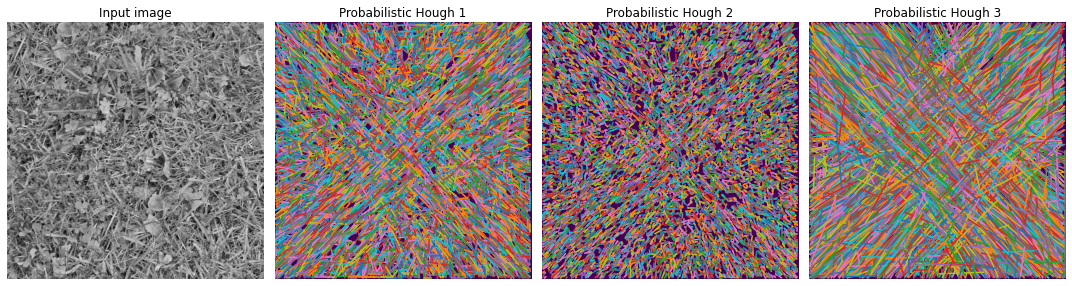

In [35]:
#Exercício 4 - Ex 3

from skimage.transform import probabilistic_hough_line# Line finding using the Probabilistic Hough Transform
image = data.grass()
edges = canny(image, 2, 1, 25)

lines = probabilistic_hough_line(edges, threshold=1, line_length=0, line_gap=5) 
lines1 = probabilistic_hough_line(edges, threshold=10, line_length=10, line_gap=10)
lines2 = probabilistic_hough_line(edges, threshold=100, line_length=20, line_gap=20)

# Generating figure 2
fig, axes = plt.subplots(1, 4, figsize=(15, 5), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(image, cmap=cm.gray)
ax[0].set_title('Input image')

ax[1].imshow(edges * 0)
for line in lines1:
  p0, p1 = line
  ax[1].plot((p0[0], p1[0]), (p0[1], p1[1]))
ax[1].set_xlim((0, image.shape[1]))
ax[1].set_ylim((image.shape[0], 0))
ax[1].set_title('Probabilistic Hough 1')

ax[2].imshow(edges * 0)
for line in lines:
  p0, p1 = line
  ax[2].plot((p0[0], p1[0]), (p0[1], p1[1]))
ax[2].set_xlim((0, image.shape[1]))
ax[2].set_ylim((image.shape[0], 0))
ax[2].set_title('Probabilistic Hough 2')

ax[3].imshow(edges * 0)
for line in lines2:
  p0, p1 = line
  ax[3].plot((p0[0], p1[0]), (p0[1], p1[1]))
ax[3].set_xlim((0, image.shape[1]))
ax[3].set_ylim((image.shape[0], 0))
ax[3].set_title('Probabilistic Hough 3')

for a in ax:
  a.set_axis_off()
plt.tight_layout()
plt.show()

###Conclusao - Exercício 4

Nas minhas observações noto que os três valores como descritos no Exercício 2, devem ser pensadas para cada imagem, como por exempo, o que ocorre com os tijolos e com a grama.

Sendo que no caso dos tijolos, ele possui linhas maiores. por sua vez sendo representado de uma melhor forma com um line_lenght menor. Sendo que na grama, mesmo com um line_lenght menor, se torna muito dificil a vizualização por todas as linhas serem muito pequenas, porêm ainda possui mais detalhes.

Fora esses casos, possuimos o caso da célula, que se possuirmos um gap muito alto, a imagem acaba não apresentando nenhuma forma.